In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.applications.xception import decode_predictions
from keras.applications.xception import preprocess_input

%matplotlib inline

In [8]:
model = keras.models.load_model("xception_v5.1_bigger_06_0.880.h5")

2024-11-06 14:19:20.854943: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-06 14:19:20.855309: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [16]:
path = "../test/shorts/78d2c5d2-b19d-422a-aff0-a6eb78291b4f.jpg"

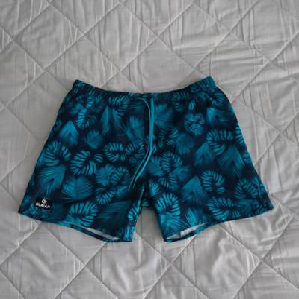

In [17]:
img = load_img(path, target_size=(299,299))
img

In [18]:
X = np.array(img)
X = np.array([X])

X = preprocess_input(X)
X.shape

(1, 299, 299, 3)

In [19]:
preds = model.predict(X)

1/1 [==============================] - 0s 120ms/step


In [20]:
preds

array([[-1.8939228 , -7.43575   , -5.697758  , -2.7814867 ,  3.9725704 ,
        -4.595516  , -7.4783125 ,  9.318405  , -0.18938531, -4.7588563 ]],
      dtype=float32)

In [21]:
classes = [
    'dress',
     'hat',
     'longsleeve',
     'outwear',
     'pants',
     'shirt',
     'shoes',
     'shorts',
     'skirt',
     't-shirt',]

dict(zip(classes, preds[0]))

{'dress': -1.8939228,
 'hat': -7.43575,
 'longsleeve': -5.697758,
 'outwear': -2.7814867,
 'pants': 3.9725704,
 'shirt': -4.595516,
 'shoes': -7.4783125,
 'shorts': 9.318405,
 'skirt': -0.18938531,
 't-shirt': -4.7588563}

In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_model = converter.convert()

with open("fashion_model.tflite", "wb") as f_out:
    f_out.write(tf_lite_model)

INFO:tensorflow:Assets written to: /var/folders/7w/yvbchwg11ds3s7mmnft7vfdm0000gp/T/tmpsn33bp10/assets


INFO:tensorflow:Assets written to: /var/folders/7w/yvbchwg11ds3s7mmnft7vfdm0000gp/T/tmpsn33bp10/assets
2024-11-06 14:25:17.582076: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-11-06 14:25:17.582134: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-11-06 14:25:17.584857: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/7w/yvbchwg11ds3s7mmnft7vfdm0000gp/T/tmpsn33bp10
2024-11-06 14:25:17.635546: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2024-11-06 14:25:17.635581: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/7w/yvbchwg11ds3s7mmnft7vfdm0000gp/T/tmpsn33bp10
2024-11-06 14:25:17.771872: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2024-11-06 14:25:17.795562: I tensorflow/cc/saved_model/load

In [23]:
import tensorflow.lite as tflite

In [24]:
#loading model
Interpreter = tflite.Interpreter("fashion_model.tflite")
#loading the weight from the model to memory
Interpreter.allocate_tensors()

input_index = Interpreter.get_input_details()[0]['index']
output_index = Interpreter.get_output_details()[0]['index']

In [25]:
Interpreter.set_tensor(input_index, X)
Interpreter.invoke()
preds_1 = Interpreter.get_tensor(output_index)

In [26]:
classes = [
    'dress',
     'hat',
     'longsleeve',
     'outwear',
     'pants',
     'shirt',
     'shoes',
     'shorts',
     'skirt',
     't-shirt']

dict(zip(classes, preds_1[0]))

{'dress': -1.8939226,
 'hat': -7.43575,
 'longsleeve': -5.6977572,
 'outwear': -2.781487,
 'pants': 3.9725707,
 'shirt': -4.595516,
 'shoes': -7.478311,
 'shorts': 9.318403,
 'skirt': -0.1893859,
 't-shirt': -4.7588563}

## Removing all dependencies from tensorflow

In [19]:
#!pip install tflite-runtime

In [7]:
import tensorflow.lite as tflite
from PIL import Image
import numpy as np

In [8]:
def preprocessing_input(x):
    x /= 127.5
    x -= 1.
    return x

In [9]:
path = "../test/shorts/78d2c5d2-b19d-422a-aff0-a6eb78291b4f.jpg"

In [10]:
with Image.open(path) as img:
    img = img.resize((299,299), Image.NEAREST)

In [11]:
X = np.array(img, dtype = 'float32')
X = np.array([X])

X = preprocessing_input(X)

In [13]:
#loading model
Interpreter = tflite.Interpreter("fashion_model.tflite")
#loading the weight from the model to memory
Interpreter.allocate_tensors()

input_index = Interpreter.get_input_details()[0]['index']
output_index = Interpreter.get_output_details()[0]['index']

In [14]:
Interpreter.set_tensor(input_index, X)
Interpreter.invoke()
preds_1 = Interpreter.get_tensor(output_index)

In [16]:
classes = [
    'dress',
     'hat',
     'longsleeve',
     'outwear',
     'pants',
     'shirt',
     'shoes',
     'shorts',
     'skirt',
     't-shirt',]

dict(zip(classes, preds_1[0]))

{'dress': -1.8939226,
 'hat': -7.43575,
 'longsleeve': -5.6977572,
 'outwear': -2.781487,
 'pants': 3.9725707,
 'shirt': -4.595516,
 'shoes': -7.478311,
 'shorts': 9.318403,
 'skirt': -0.1893859,
 't-shirt': -4.7588563}